In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_dir='D:\TAD\Tutorials\course\TF_2_Notebooks_and_Data\cell_images'

In [7]:
os.listdir(data_dir)

['test', 'train']

In [10]:
from matplotlib.image import imread

In [12]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [13]:
test_path

'D:\\TAD\\Tutorials\\course\\TF_2_Notebooks_and_Data\\cell_images\\test\\'

In [14]:
train_path

'D:\\TAD\\Tutorials\\course\\TF_2_Notebooks_and_Data\\cell_images\\train\\'

In [15]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

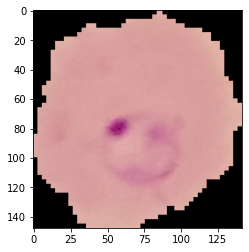

In [21]:
para_cell=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.imshow(imread(para_cell))

In [22]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

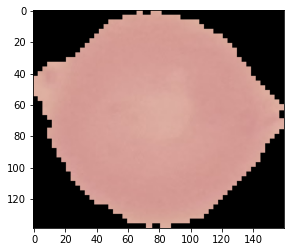

In [23]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'
plt.imshow(imread(uninfected_cell))

In [24]:
len(os.listdir(train_path+'uninfected'))

12480

In [25]:
len(os.listdir(train_path+'parasitized'))

12480

In [27]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

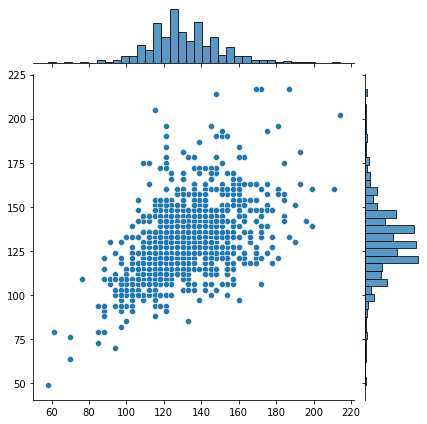

In [31]:
sns.jointplot(dim1,dim2)

In [32]:
image_shape = (130,130,3)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
#help(ImageDataGenerator),recomended to read
imread(para_cell).max()

0.9098039

In [39]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

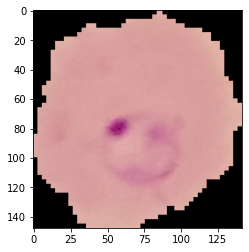

In [40]:
para_img = imread(para_cell)
plt.imshow(para_img)

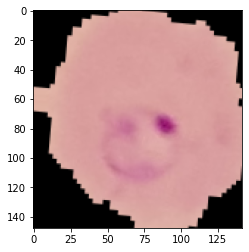

In [44]:
plt.imshow(image_gen.random_transform(para_img))

In [45]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [46]:
from tensorflow.keras.models import Sequential


In [50]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [55]:
batch_size= 16

In [56]:
#remember to not shuffle the test data as it will not be the same as that of the Y_test data. 
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                              color_mode='rgb',batch_size=batch_size,class_mode='binary')
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                              color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [57]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [58]:
result = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 281s 180ms/step - loss: 0.9072 - accuracy: 0.5473 - val_loss: 0.6827 - val_accuracy: 0.5592
Epoch 2/20
1560/1560 [==============================] - 281s 180ms/step - loss: 0.6811 - accuracy: 0.5719 - val_loss: 0.6707 - val_accuracy: 0.5900
Epoch 3/20
1560/1560 [==============================] - 272s 174ms/step - loss: 0.6758 - accuracy: 0.5880 - val_loss: 0.6780 - val_accuracy: 0.5835
Epoch 4/20
1560/1560 [==============================] - 271s 174ms/step - loss: 0.6696 - accuracy: 0.6011 - val_loss: 0.6705 - val_accuracy: 0.5977
Epoch 5/20
1560/1560 [==============================] - 271s 174ms/step - loss: 0.6637 - accuracy: 0.6073 - val_loss: 0.6561 - val_accuracy: 0.6127
Epoch 6/20
1560/1560 [==============================] - 273s 175ms/step - loss: 0.6635 - accuracy: 0.6146 - val_loss: 0.6603 - val_accuracy: 0.6096
Epoch 7/20
1560/1560 [==============

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model = load_model('malaria_detector.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [62]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[36.589569091796875, 0.8711538314819336]

In [63]:
model.evaluate(test_image_gen)

163/163 [==============================] - 13s 83ms/step - loss: 36.4397 - accuracy: 0.8742


[36.439720153808594, 0.8742307424545288]

In [64]:
prediction = model.predict(test_image_gen)

In [74]:
prediction = prediction >0.8

In [75]:
 prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
print(classification_report(test_image_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [73]:
confusion_matrix(test_image_gen.classes,prediction)

array([[1274,   26],
       [ 304,  996]], dtype=int64)

In [77]:
para_cell

'D:\\TAD\\Tutorials\\course\\TF_2_Notebooks_and_Data\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [79]:
from tensorflow.keras.preprocessing import image

In [81]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [89]:
my_image_array=image.img_to_array(my_image)

In [85]:
my_image_array.shape

(130, 130, 3)

In [91]:
my_image_array=np.expand_dims(my_image_array,axis=0)

In [92]:
my_image_array.shape

(1, 130, 130, 3)

In [93]:
model.predict(my_image_array)

array([[0.]], dtype=float32)